## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In order analyze an experiment in way that determines whether or not there is any statistical significance, a useful scientifically based methodology is the A/B test.  This tests the effectiveness of a control vs a treatment group and was originally intended for testing an old web page vs. a new one.  In order to carry out this type of experiment objectively, it is integral that there is an attempt to disprove the effectiveness of the treatment group.  In turn, there is a "null" hypothesis that states there is no statistical difference from the contol group for the treatment group.  Additionally, the alternitave hypothesis states that there is a statistically significant difference.  The point of A/B testing is to prove the null hypothesis, and if this fails, then the alternative hypothesis is excepted. 


In this hypothetical scenario, a simple data set of two web pages for an e-commerce website are analyzed.  With a neew webpage tested as a treatment group, and the old webpage as the control group, the company wants to know whether or not the new web page increases the "conversion" rate.  The conversion rate is the proportion of website users that buy the companies product.  

In order to test the new page for statistical significance in a realiable and scientific way, the results must be tested against the possibility of random distibution in results.  The following demonstrates how this type of test can be performed using three different meathods in python.  

<a id='probability'></a>
#### Part I - Probability

First the necessary libraries for hypothesis testing and visualizations are imported

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for consistent output
random.seed(42)

#the seaborn set method is used to help with histogram formatting
sns.set()


`1.` `ab_data.csv` is stored in `df`.  

a. The first five lines of the data are queried below:

In [2]:
#use the pandas read_csv method to import dataframe and view first five lines
df = pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. The number of rows in the dataset:

In [3]:
#view details about dataframe shape and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset:

In [4]:
#Count the number of unique user_id's in the dataframe
print('unique users:', df.user_id.nunique())


unique users: 290584


d. The proportion of users converted:

In [5]:
#finds the average of the 1 and 0 values in the converted collumn which is equivalent to a proportion of converted
print('proportion converted:', df.converted.mean())


proportion converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` do not match:

In [6]:
#filters rows where group is treatment and not new page into the variable nomatch1
nomatch1 = df.query("group == 'treatment' and landing_page != 'new_page'")

#fiters rows where the landing page is new_page and the group is not tratment into the variable nomatch2
nomatch2 = df.query("group != 'treatment' and landing_page == 'new_page'")

#the nomatch variable is the combination of the count of nomatch1 and nomatch2. nomatch.user_id is then displayed
#as a count of unmatched rows
nomatch = nomatch1.count() + nomatch2.count()
print('number of unmatched rows:', nomatch.user_id)


number of unmatched rows: 3893


f. Next, we ensure that none of the collumns have any missing values.

In [7]:
#displays null values in each dataframe collumn
df.isna().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Next, we will save the appropriately matched rows into the new dataframe: **DF2**

In [8]:
#two querys are stored in two dataframes that contain rows where 'treatment' group matches 'new_page' and 'control' group
#matches 'old_page'.
match_new = df.query("group == 'treatment' and landing_page == 'new_page'")
match_old = df.query("group == 'control' and landing_page == 'old_page'")
#the frist dataframe is appended to the other and saved under the variable: 'df2'
df2 = match_new.append(match_old)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

b. Next, we muist check for any duplicated **user_id**'s in **df2**:

In [10]:
#counts user_id occurences in descending order
#the first user_id desplayed is the only repeat
df2.user_id.value_counts()


773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. Confirmation of row information for the repeat **user_id**: 

In [11]:
#query to display the row information for the repeated user_id
df2.query("user_id == '773192'")


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Next, we remove **one** of the rows with a duplicate **user_id** in **df2**:

In [12]:
#drops one of the repeated user_id rows by index number
df2 = df2.drop(index=2893)


`4.` Now we can find the observed statistics in **df2**.

a. Probability of an individual converting regardless of the page they receive:

In [13]:
#finds the conversion rate of all data
print('conversion rate:', df2.converted.mean())


conversion rate: 0.11959708724499628


b. Given that an individual was in the `control` group, below is the probability they converted:

In [14]:
#filters rows by 'control' group and finds the proportion of converted users.
control_rate = df2.query("group == 'control'")['converted'].mean()
print('control group conversion rate:', control_rate)


control group conversion rate: 0.1203863045004612


c. Given that an individual was in the `treatment` group, below is the probability they converted:

In [15]:
#filters rows by 'treatment' group and finds proportion of converted users
treatment_rate = df2.query("group == 'treatment'")['converted'].mean()
print('treatment group conversion rate:', treatment_rate)


treatment group conversion rate: 0.11880806551510564


d. Probability that an individual received the new page:

In [16]:
#divides the count of user_id's that recieved the new page by the count of all user_id's to find probability of recieving 
#the new page
print('new page probability:', df2.query("landing_page == 'new_page'")['user_id'].count() / df2.user_id.count())


new page probability: 0.5000619442226688


**Summary of the above results:**

After only considering the observed results, it is impossible to infer anything.  There needs to be logistic regression models or sample distributions along with p-values in order to determine confidence in AB testing.  This scientific approach is used in an attempt to prove the null hypothesis of no or negative effect from the new page on conversion rates.

<a id='ab_test'></a>
### Part II - A/B Test

- This cell needs to be an explanation of how to organize the null and alternative hypotheses below with an assumed type I error rate of 5%.  This must also reference the observed data


**Hypothesis layout:**

$$H_0: P_{new} - p_{old} \le 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` As follows is a sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. **conversion rate** for $p_{new}$ under the null hypothesis:

In [17]:
#the conversion rateis assumed to be equal for both groups
null_rate = df2.converted.mean()
print('the null conversion rate is:', null_rate)


the null conversion rate is: 0.11959708724499628


b. It should be noted that the **conversion rate** for $p_{old}$ under the null is the same: <br><br>

In [18]:
#the null rate is displayed as the null conversion rate is the same for both groups
print('the null conversion rate is still:', null_rate)


the null conversion rate is still: 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [19]:
#df2 is filtered by the 'treatment' group and counted.  The result is assigned to the n_new variable
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
print('number of individuals in treatment group:', n_new)


number of individuals in treatment group: 145310


d. The number of individuals in the control group:

In [20]:
#df2 is filtered by the 'control' group and counted.  The result is assigned to the n_old variable
n_old = df2[df2['group'] == 'control']['user_id'].count()
print('number of individuals in control group:', n_old)


number of individuals in control group: 145274


e. Below is a single simulation of  $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  These are stored as  $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
#numpy.random.choice() is used to simulate conversions based on the number of individuals in the treatment group 
#and the null conversion rate.
new_page_converted = np.random.choice(2, size=n_new, p=[(1 - null_rate), null_rate])


f. Below is a single simulation of $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  These are stored as $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
#numpy.random.choice() is used to simulate conversions based on the number of individuals in the control group 
#and the null conversion rate.
old_page_converted = np.random.choice(2, size=n_old, p=[(1 - null_rate), null_rate])


g. Below is the difference of $p_{new}$ - $p_{old}$ for the single simulations in parts (e) and (f).

In [23]:
#the mean of 'old_page_converted' is subtracted from 'new_page_converted' in order to find any difference in simmulated
#conversion rates
print('simulated difference:', new_page_converted.mean() - old_page_converted.mean())


simulated difference: -0.00039453371573165696


h. In order to find a statistically reliable normal distribution of the above simulation, it must be repeated numerous times. Below, a for-loop simulates 10,000 $p_{new}$ - $p_{old}$ values.  All 10,000 values are the stored in a NumPy array called **p_diffs**.

In [24]:
#this iterates the previous simulation steps: a-g 1000 times to find the differences in means under the null hypothesis.  
#each resulting difference is appended to a list assigned to the variable: p_diffs.
p_diffs = []
for i in range(1000):
    new_bootstrap = np.random.choice(2, size=n_new, p=[(1 - null_rate), null_rate]).mean()
    old_bootstrap = np.random.choice(2, size=n_old, p=[(1 - null_rate), null_rate]).mean()
    p_diffs.append(new_bootstrap - old_bootstrap)


i. Now a histogram of **p_diffs** may be created.  The following two cells result in the inline histogram of a normal distribution under the null hypothesis.

In [25]:
#the list: p_diffs is converted to a numpy array for more efficient implementation of functions
p_diffs = np.array(p_diffs)


Text(0, 0.5, 'Count of simulations')

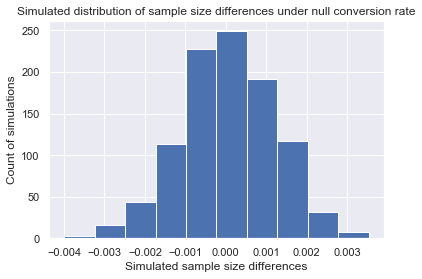

In [26]:
#the numpy array p_diffs normal distribution is then plotted with the matplotlib histogram function
plt.hist(p_diffs)
plt.title('Simulated distribution of sample size differences under null conversion rate')
plt.xlabel('Simulated sample size differences')
plt.ylabel('Count of simulations')


j. Next, we must find the proportion of **p_diffs** that are are greater than the actual difference observed in **ab_data.csv**.

- here I should explain exactly how the p-value is calculated

In [27]:
#the observed difference in 'control' and 'treatment' group conversions is assigned to the variable: obs_diff
obs_diff = treatment_rate - control_rate
obs_diff


-0.0015782389853555567

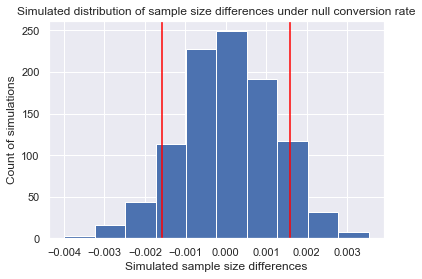

In [28]:
#for ease of visualization, the obseved difference is plotted as an x intercept red line over the previously calculated 
#normal distribution
plt.hist(p_diffs)
plt.title('Simulated distribution of sample size differences under null conversion rate')
plt.xlabel('Simulated sample size differences')
plt.ylabel('Count of simulations')
plt.axvline(x=obs_diff, color='red')
plt.axvline(x=-obs_diff, color='red')


In [29]:
#in order to find the p-value of the null hypothesis, the mean of the simulated differences that are less than the observed
#difference is calculated
print('the p-value of the null hypothesis is:', (p_diffs > obs_diff).mean())


the p-value of the null hypothesis is: 0.913


k. **Further explanation of above outputs:

As directly observed in the data, the conversion rate was slightly greater for the control group than the treatment group.  This is illustrated by an observed difference of approximately -0.2% in the red line above.  In order to determine the probability of this outcome under the null hypothesis, assuming that conversion rates were equal for both groups, 10000 samples were simulated for each group's size under the null conversion rate.  The normal probability distribution of the differences in conversion rates are illustrated in the above histogram.  It turns out that the __p_value__ for the observed difference in this case is 0.89.  In other words, the probability of the null-hypothesis being true for the observed data is 89%.  This is significantly higher than the 5% type one error rate threshold. This aligns with the observed observation that the control group was converted at a slightly higher rate than the treatment group.

In this case, __the null hypothesis was not successfully disproven__.

l. Below is a much simpler and more efficient method to hypothesis testing; however the results are harder to understand and may be misleading if falsly interpretted.  Note that `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
#statsmodels.api is imported to create logistic regressions and z-test
import statsmodels.api as sm

#the amount of converted for each group are assigned to variables
convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()

#the total individuals in each group are assigned to variables
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

m. Next, the `stats.proportions_ztest` function is implemented to compute the test statistic and p-value.

In [31]:
#the variables for converted and totals are assigned to counts and nobs respectively
counts = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
#the z-test accepts the counts and nobs variables and calculates the p-value according to the null hypothesis, 
#which is specified by the alternative='smaller' argument
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
print('p-value:', pval, '\nz-score:', stat)


p-value: 0.9050583127590245 
z-score: 1.3109241984234394


**Note the difference in p-values between the two methods:**

The z-score and p-value calculated from stats.proportions_ztest match the results from the simulated distribution.  Additionally, the z-score of 1.31 does not contradict the normal distribution.  Both tests have about a 0.90 p-value indicating that the null hypothesis: $H_0: P_n - P_o \le 0$ cannot come even close to being disproven in this case.

- in this cell, an emphasis on the difference in the two p-values and the typed of hypotheses should be elaborated on

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, the results above will be acheived thrpough yet another method: logistic regression.<br><br> 


**Nore:**
We use a use a logistic regression since they are best for predicting one of two outcomes rather than a continuous series of quantitative outcomes, which would be more appropriately interpretted through linear regression. 

b. In order to prepare for a regression model, we must create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Then, we an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#create an intercept collumn for regression calculations
df2['intercept'] = 1


In [33]:
#assign dummy collumns based on treatment and control groups
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])


In [34]:
#drop control group so that only ab_group remains
df2 = df2.drop('control', axis=1)


In [35]:
#preview dataframe to confirm 'ab_page' collumn
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. The, we use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
#create logistic regression to determine probability of conversion based on treatment or control group
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

#fit model and summarize results
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:56:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. **Summary of the output:**

The p-value associated with the logistic regression model is 0.19 which is different from the calculated 0.9 p-value.  The original null hypothesis was that the control group had at least as many conversions as the treatment group.  The logistic regression model simply determines the probability that the conversions will be different from the mean.  If the p-value was based on the following hypothesis, then the results would match: $$H_O: p_n = p_o$$ $$H_1: p_n \ne p_o$$

f. **Consideration of additional factors or lurking variables:**

In order to determine factors that influence conversion rates, many demographic factors may be of influence.  For example, the age, country of origin or gender of the individual.  Perhaps income is an influence as well.  

Although it would be useful to test all of these factors in tandem, they may be misleading.  This is due to the increased likelyhood that the variables being tested have a lurking multicollinear relationship with eachother.

g. **Addition of another variable:** 

Next we determine of the addition of a **country** variable has an impact on conversion rate.

In [37]:
#load 'countries.csv' into the pandas dataframe: df_c and preview the first five lines
df_c = pd.read_csv('countries.csv')
df_c.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
#set df_c index as 'user_id' in order to join the country collumn inplace to df2
df2 = df2.join(df_c.set_index('user_id'), on='user_id')

#preview five lines to ensure successful join
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [39]:
#retrieve dummy variables for each country and join them to df2 inplace
df2 = df2.join(pd.get_dummies(df2['country']))

#preview five lines to ensure success
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [40]:
#create logistic regression to compare probability of conversion rates for US and UK as compared to CA
logit_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'US', 'UK']])

#fit the regression and summarize results
results2 = logit_mod2.fit()
results2.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        17:56:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**Explanation of output:**

As seen by the p-values of 'US' and 'UK' in comparision to 'CA', no statistical significance disproving the null can be inferred from the logistic model.  Therefore, no multiplicitive change in the odds of conversion based on country can be determined by the coefficients. 

h. **Implementation of interaction variables between country and group:**

- explain how interaction variables work here

In [41]:
#create three new collumns that are the interactions of country and ab_page inplace in df2
df2['CA_ab'] = df2['CA'] * df2['ab_page']
df2['UK_ab'] = df2['UK'] * df2['ab_page']
df2['US_ab'] = df2['US'] * df2['ab_page']

#confirm the addition of the new collumns
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_ab,UK_ab,US_ab
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0,0


In [42]:
#create logistic regression comparing probability of conversion based on interactions of ab_page and country collumns
logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'UK_ab', 'US_ab']])

#fit the regression and summarize results
results3 = logit_mod3.fit()
results3.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        17:56:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab          0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

__Explanation of output:__

With the inclusion of treatment page and country in the same logistic model, there appears to be no significant interaction between the variables and their effect on conversion.  The p-values of 'UK_ab' and 'US_ab' are extremely high as are their isolated regression model p-values. This suggests that there no statistically significant effect on country and ab_page combined conversion rates when compared to eachother.  This therefore fails to disprove the null hypothesis. 

__Conclusion of results:__

From the above logistic regressions, there is no evidence to suggest that conversion rates differ based on country of origin, treatment group, or a combination of the two variables with a type one error threshold of 5%.  Additionally, there is a large enough sample size to be confident in a failure to disprove the null hypothesis.  Perhaps there are other unconsidered lurking variables, but the ones under consideration do not appear to have statistical significance.  